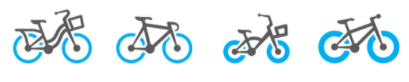

# Data Fields
* datetime - hourly date + timestamp  
* season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
* holiday - whether the day is considered a holiday
* workingday - whether the day is neither a weekend nor holiday
* weather
 * 1: Clear, Few clouds, Partly cloudy, Partly cloudy
 * 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
 * 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
 * 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
* temp - temperature in Celsius
* atemp - "feels like" temperature in Celsius
* humidity - relative humidity
* windspeed - wind speed
* casual - number of non-registered user rentals initiated
* registered - number of registered user rentals initiated
* count - number of total rentals

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# 노트북 안에 그래프를 그리기 위해
%matplotlib inline

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
plt.style.use('ggplot')

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

# seaborn 그래프 한글 깨짐 방지
plt.rcParams['font.family'] = 'NanumGothic'

In [2]:
train = pd.read_csv("/SBA/bike/train.csv", parse_dates = ["datetime"])
train.shape

(10886, 12)

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [4]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [5]:
train.temp.describe()

count    10886.00000
mean        20.23086
std          7.79159
min          0.82000
25%         13.94000
50%         20.50000
75%         26.24000
max         41.00000
Name: temp, dtype: float64

In [6]:
# null 데이터 개수 파악
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

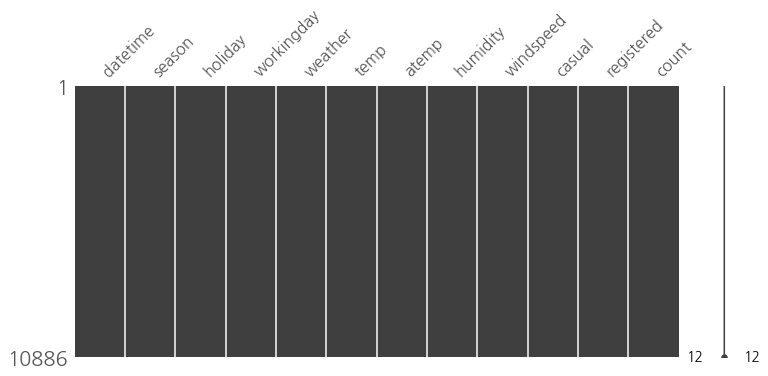

In [7]:
# null 데이터 파악. 없다.
import missingno as msno

msno.matrix(train, figsize = (12,5))

In [8]:
# train 데이터의 날짜 및 시간을 더욱 쉽게 볼 수 있도록.
train["year"] = train["datetime"].dt.year
train["month"] = train["datetime"].dt.month
train["day"] = train["datetime"].dt.day
train["hour"] = train["datetime"].dt.hour
train["minute"] = train["datetime"].dt.minute
train["second"] = train["datetime"].dt.second
train.shape

(10886, 18)

In [9]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


[Text(0, 0.5, 'Second'), Text(0.5, 1.0, '초별 대여량')]

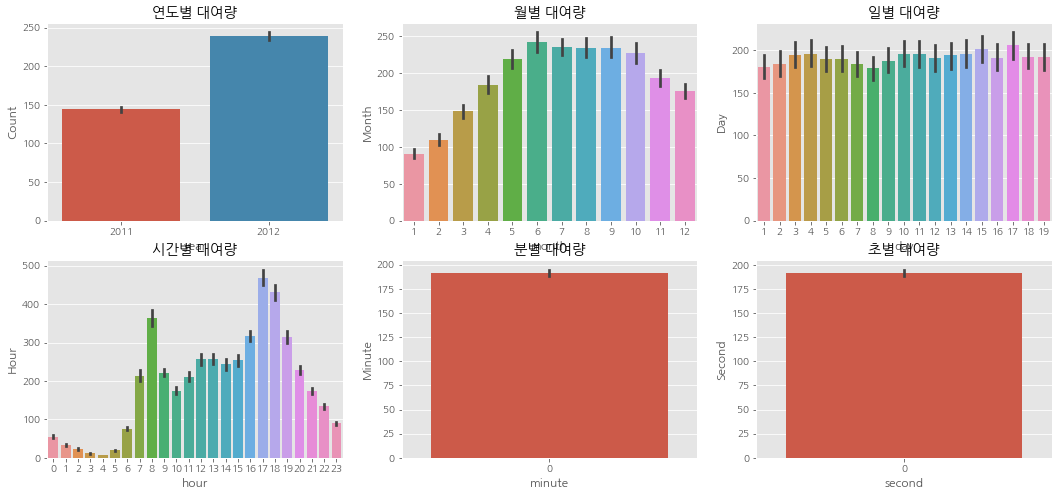

In [10]:
figure, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows = 2, ncols = 3)
figure.set_size_inches(18, 8)

sns.barplot(data = train, x = "year", y = "count", ax = ax1)
sns.barplot(data = train, x = "month", y = "count", ax = ax2)
sns.barplot(data = train, x = "day", y = "count", ax = ax3)
sns.barplot(data = train, x = "hour", y = "count", ax = ax4)
sns.barplot(data = train, x = "minute", y = "count", ax = ax5)
sns.barplot(data = train, x = "second", y = "count", ax = ax6)

ax1.set(ylabel = 'Count', title = '연도별 대여량')
ax2.set(ylabel = 'Month', title = '월별 대여량')
ax3.set(ylabel = 'Day', title = '일별 대여량')
ax4.set(ylabel = 'Hour', title = '시간별 대여량')
ax5.set(ylabel = 'Minute', title = '분별 대여량')
ax6.set(ylabel = 'Second', title = '초별 대여량')

* 연도별 대여량은 2011년 보다 2012년이 더 많다.
* 월별 대여량은 6월이 가장 많고, 7~10월에 많다. 그리고 1월이 가장 적다.
* 일별대여량은 1~19일까지만 있고, 나머지 날짜는 test.csv에 있다. (안 봐도 됨)
* 시간 내 대여량을 보면 출퇴근 시간에 대여량이 많다. 하지만 주말과 나누어 볼 필요가 있다.
* 분, 초는 의미가 없다

[Text(0, 0.5, 'Working Day'), Text(0.5, 1.0, '근무일 여부에 따른 대여량')]

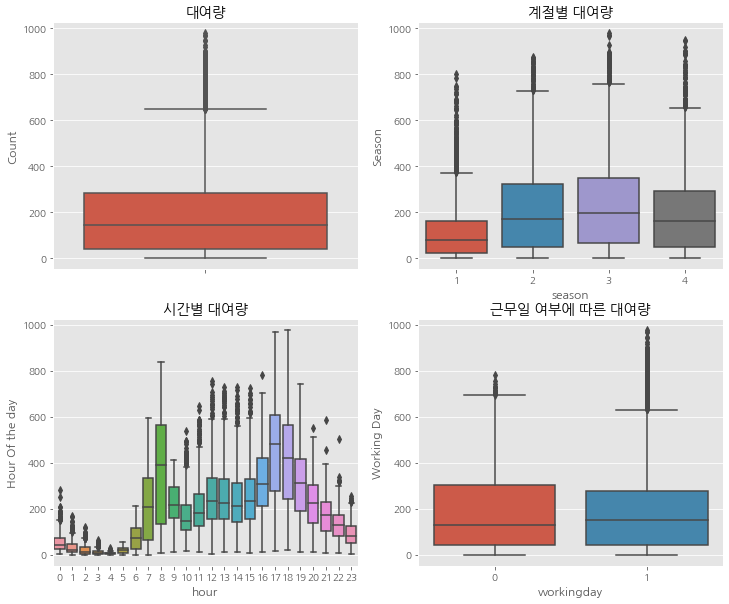

In [27]:
fig, axes = plt.subplots(nrows = 2, ncols = 2)
fig.set_size_inches(12, 10)

sns.boxplot(data = train, y = "count", orient = 'v', ax = axes[0][0])
sns.boxplot(data = train, y = "count", x = "season", orient = 'v', ax = axes[0][1])
sns.boxplot(data = train, y = "count", x = "hour", orient = 'v', ax = axes[1][0])
sns.boxplot(data = train, y = "count", x= "workingday", orient = 'v', ax = axes[1][1])

axes[0][0].set(ylabel = "Count", title = "대여량")
axes[0][1].set(ylabel = "Season", title = "계절별 대여량")
axes[1][0].set(ylabel = "Hour Of the day", title = "시간별 대여량")
axes[1][1].set(ylabel = "Working Day", title = "근무일 여부에 따른 대여량")

In [12]:
train["dayofweek"] = train["datetime"].dt.dayofweek
train.shape

(10886, 19)

In [13]:
# 요일 (0 ~ 6)
train["dayofweek"].value_counts()

5    1584
6    1579
3    1553
2    1551
0    1551
1    1539
4    1529
Name: dayofweek, dtype: int64

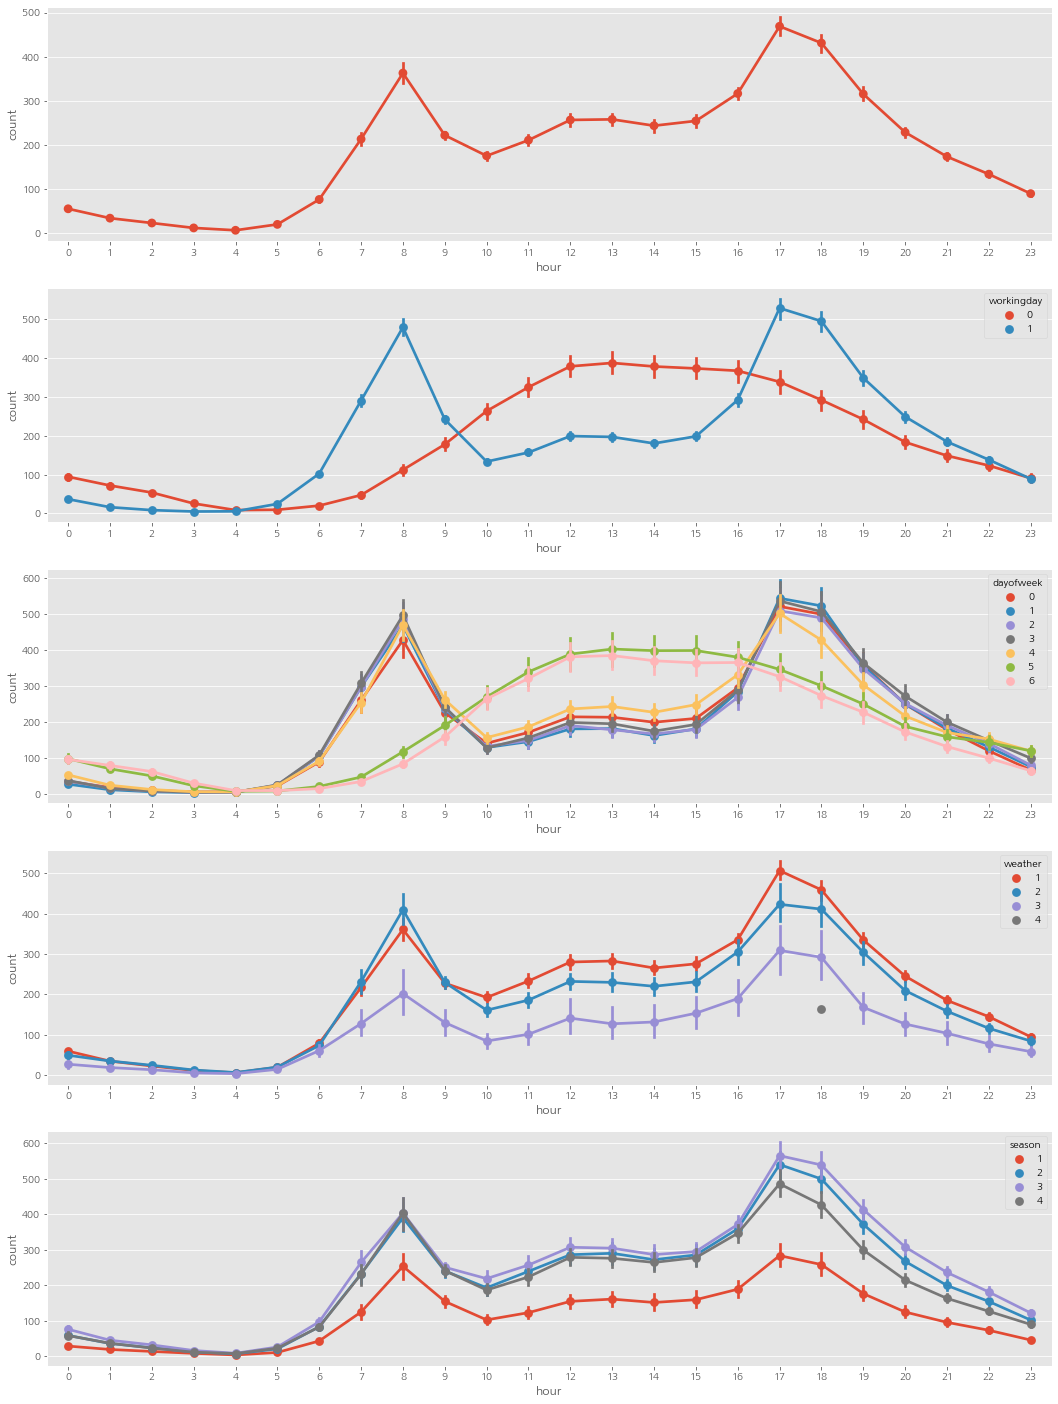

In [14]:
# 시간대별 대여량
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows = 5)
fig.set_size_inches(18, 25)

sns.pointplot(data = train, x = "hour", y = "count", ax = ax1)
sns.pointplot(data = train, x = "hour", y = "count", hue = "workingday", ax = ax2)
sns.pointplot(data = train, x = "hour", y = "count", hue = "dayofweek", ax = ax3)
sns.pointplot(data = train, x = "hour", y = "count", hue = "weather", ax = ax4)
sns.pointplot(data = train, x = "hour", y = "count", hue = "season", ax = ax5)

In [15]:
corrMatt = train[["temp", "atemp", "casual", "registered", "humidity", "windspeed", "count"]]
corrMatt = corrMatt.corr()
print(corrMatt)

mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False

                temp     atemp    casual  registered  humidity  windspeed  \
temp        1.000000  0.984948  0.467097    0.318571 -0.064949  -0.017852   
atemp       0.984948  1.000000  0.462067    0.314635 -0.043536  -0.057473   
casual      0.467097  0.462067  1.000000    0.497250 -0.348187   0.092276   
registered  0.318571  0.314635  0.497250    1.000000 -0.265458   0.091052   
humidity   -0.064949 -0.043536 -0.348187   -0.265458  1.000000  -0.318607   
windspeed  -0.017852 -0.057473  0.092276    0.091052 -0.318607   1.000000   
count       0.394454  0.389784  0.690414    0.970948 -0.317371   0.101369   

               count  
temp        0.394454  
atemp       0.389784  
casual      0.690414  
registered  0.970948  
humidity   -0.317371  
windspeed   0.101369  
count       1.000000  


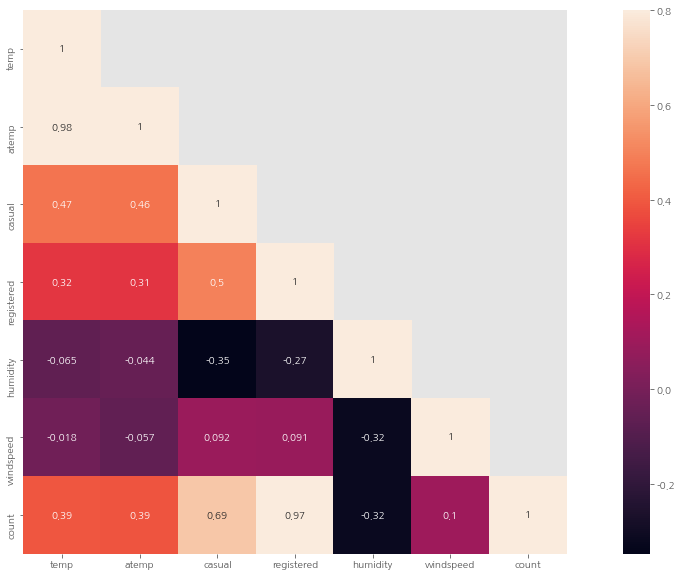

In [16]:
fig, ax = plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrMatt, mask = mask, vmax = .8, square = True, annot = True)

* 온도, 습도, 풍속은 거의 연관관계가 없다.
* 대여량과 가장 연관이 높은 건 registered로 등록된 대여자가 많지만 test 데이터에는 이 값이 없다.
* atemp와 temp는 0.98로 상관관계가 높지만 온도와 체감온도로 피처로 사용하기에 적합하지 않을 수 있다.

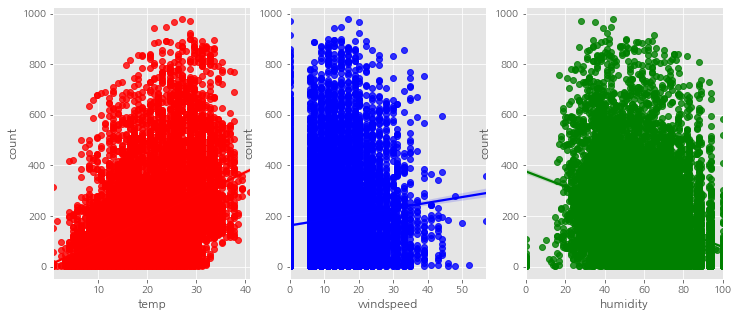

In [17]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3)
fig.set_size_inches(12, 5)
sns.regplot(x = "temp", y = "count", color = 'red', data = train, ax = ax1)
sns.regplot(x = "windspeed", y = "count", color = 'blue', data = train, ax = ax2)
sns.regplot(x = "humidity", y = "count", color = 'green', data = train, ax = ax3)

In [18]:
# 년도와 월을 붙여서 보자.
def concatenate_year_month(datetime):
    return "{0}-{1}".format(datetime.year, datetime.month)

train["year_month"] = train["datetime"].apply(concatenate_year_month)

print(train.shape)
train[["datetime", "year_month"]].head()

(10886, 20)


,datetime,year_month
0,2011-01-01 00:00:00,2011-1
1,2011-01-01 01:00:00,2011-1
2,2011-01-01 02:00:00,2011-1
3,2011-01-01 03:00:00,2011-1
4,2011-01-01 04:00:00,2011-1


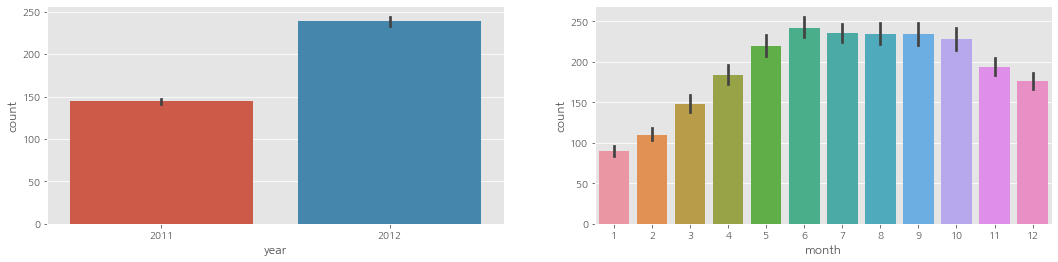

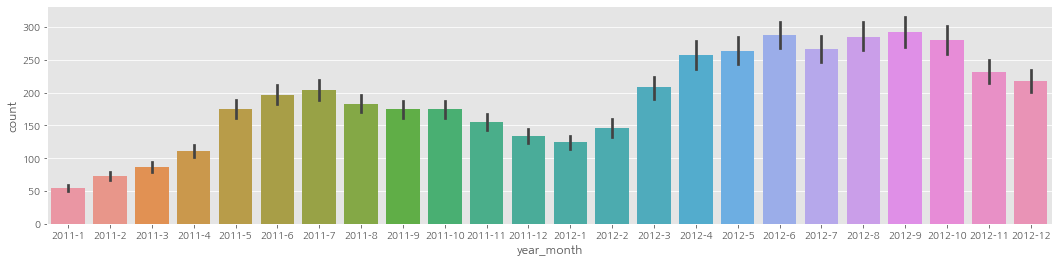

In [19]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2)
fig.set_size_inches(18, 4)

sns.barplot(data = train, x = "year", y = "count", ax = ax1)
sns.barplot(data = train, x = "month", y = "count", ax = ax2)

fig, ax3 = plt.subplots(nrows = 1, ncols = 1)
fig.set_size_inches(18, 4)

sns.barplot(data = train, x = "year_month", y = "count", ax = ax3)

* 2011년보다 2012년도의 대여량이 많다.
* 겨울보다는 여름에 대여량이 많다.
* 2011년과 2012년의 월별 데이터를 이어보면 전체적으로 증가하는 추세이다.

In [20]:
# trainWithoutOutliers : 0에 몰려있는 데이터 등을 제거한다

trainWithoutOutliers = train[np.abs(train["count"] - train["count"].mean()) <= (3 * train["count"].std())]

print(train.shape)
print(trainWithoutOutliers.shape)

(10886, 20)
(10739, 20)


((array([-3.82819677, -3.60401975, -3.48099008, ...,  3.48099008,
          3.60401975,  3.82819677]),
  array([0.69314718, 0.69314718, 0.69314718, ..., 6.5971457 , 6.59850903,
         6.5998705 ])),
 (1.3486990121229776, 4.562423868087808, 0.9581176780909612))

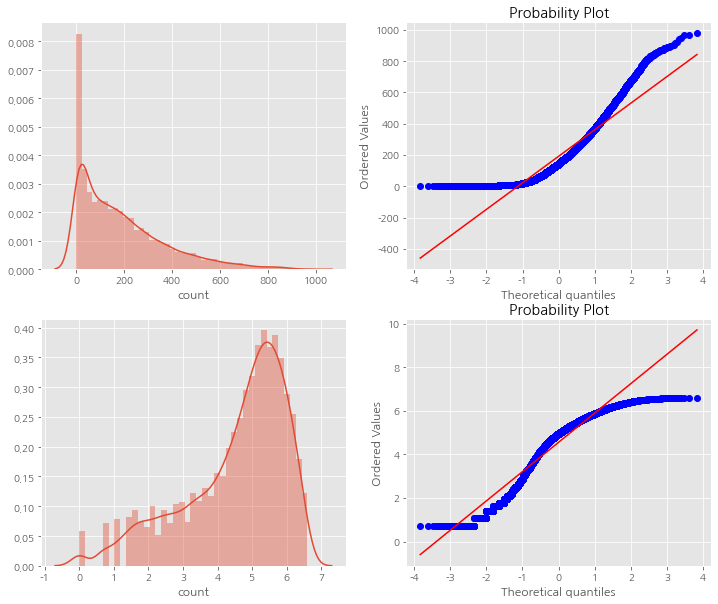

In [21]:
# count값의 데이터 분포도 파악

figure, axes = plt.subplots(ncols = 2, nrows = 2)
figure.set_size_inches(12, 10)

sns.distplot(train["count"], ax = axes[0][0])
stats.probplot(train["count"], dist = "norm", fit = True, plot = axes[0][1])
sns.distplot(np.log(trainWithoutOutliers["count"]), ax = axes[1][0])
stats.probplot(np.log1p(trainWithoutOutliers["count"]), dist = 'norm', fit = True, plot = axes[1][1])

count변수가 오른쪽에 치우쳐져 있다. 대부분의 기계학습은 종속변수가 normal 이어야 하기에 정규분포를 갖는 것이 바람직하다. 대안으로 outlier data를 제거하고 "count"변수에 로그를 씌워 변경해 봐도 정규분포를 따르지는 않지만 이전 그래프보다는 좀 더 자세히 표현하고 있다.